# Data Analysis without graph

In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

In [ ]:
print(os.getcwd())

/content/gdrive/MyDrive/Capstone Code


In [ ]:
drive.mount('/content/gdrive')

path = "/content/gdrive/My Drive/Capstone Code"
os.chdir(path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. Biospecimen TCGA BRCA

In [ ]:
bio = pd.read_json('./data/biospecimen_tcga_brca.json')

In [ ]:
bio.head(5)

,case_id,project,submitter_id,samples
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,{'project_id': 'TCGA-BRCA'},TCGA-E2-A1IU,"[{'sample_type_id': '01', 'tumor_descriptor': ..."
1,0045349c-69d9-4306-a403-c9c1fa836644,{'project_id': 'TCGA-BRCA'},TCGA-A1-A0SB,"[{'sample_type_id': '10', 'tumor_descriptor': ..."
2,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,{'project_id': 'TCGA-BRCA'},TCGA-A2-A04W,"[{'sample_type_id': '10', 'tumor_descriptor': ..."
3,00a2d166-78c9-4687-a195-3d6315c27574,{'project_id': 'TCGA-BRCA'},TCGA-AN-A0AM,"[{'sample_type_id': '01', 'tumor_descriptor': ..."
4,00b11ca8-8540-4a3d-b602-ec754b00230b,{'project_id': 'TCGA-BRCA'},TCGA-LL-A440,"[{'sample_type_id': '01', 'tumor_descriptor': ..."


In [ ]:
import json
import pandas as pd


with open('./data/biospecimen_tcga_brca.json', 'r') as f:
    data = json.load(f)

slides_data = []

for case in data:
    case_id = case.get("case_id")
    project_id = case.get("project", {}).get("project_id")
    submitter_id = case.get("submitter_id")

    for sample in case.get("samples", []):
        sample_id = sample.get("submitter_id")

        for portion in sample.get("portions", []):
            portion_id = portion.get("submitter_id")

            for slide in portion.get("slides", []):
                slides_data.append({
                    "case_id": case_id,
                    "project_id": project_id,
                    "submitter_id": submitter_id,
                    "sample_submitter_id": sample_id,
                    "portion_submitter_id": portion_id,
                    "slide_submitter_id": slide.get("submitter_id"),
                    "slide_id": slide.get("slide_id"),
                    "percent_tumor_cells": slide.get("percent_tumor_cells", "N/A"),
                    "percent_normal_cells": slide.get("percent_normal_cells", "N/A"),
                    "section_location": slide.get("section_location", "N/A")
                })


df = pd.DataFrame(slides_data)


print(df.head())


                                case_id project_id  submitter_id  \
0  001cef41-ff86-4d3f-a140-a647ac4b10a1  TCGA-BRCA  TCGA-E2-A1IU   
1  001cef41-ff86-4d3f-a140-a647ac4b10a1  TCGA-BRCA  TCGA-E2-A1IU   
2  001cef41-ff86-4d3f-a140-a647ac4b10a1  TCGA-BRCA  TCGA-E2-A1IU   
3  001cef41-ff86-4d3f-a140-a647ac4b10a1  TCGA-BRCA  TCGA-E2-A1IU   
4  001cef41-ff86-4d3f-a140-a647ac4b10a1  TCGA-BRCA  TCGA-E2-A1IU   

  sample_submitter_id portion_submitter_id       slide_submitter_id  \
0    TCGA-E2-A1IU-01Z                 None  TCGA-E2-A1IU-01Z-00-DX1   
1    TCGA-E2-A1IU-01A  TCGA-E2-A1IU-01A-11  TCGA-E2-A1IU-01A-01-TSA   
2    TCGA-E2-A1IU-11A  TCGA-E2-A1IU-11A-61  TCGA-E2-A1IU-11A-01-TSA   
3    TCGA-E2-A1IU-11A  TCGA-E2-A1IU-11A-61  TCGA-E2-A1IU-11A-03-TSC   
4    TCGA-E2-A1IU-11A  TCGA-E2-A1IU-11A-61  TCGA-E2-A1IU-11A-05-TSE   

                               slide_id percent_tumor_cells  \
0  47052187-fa15-40c7-a018-33576edf48e8                 N/A   
1  ba60c639-0f0b-4ccf-8990-d561c67794a

In [ ]:

test_2_submitter_ids = test_2['submitter_id'].unique()
test_2_df = df[df['submitter_id'].isin(test_2_submitter_ids)]
test_2_df


,case_id,project_id,submitter_id,sample_submitter_id,portion_submitter_id,slide_submitter_id,slide_id,percent_tumor_cells,percent_normal_cells,section_location
8,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-BRCA,TCGA-A1-A0SB,TCGA-A1-A0SB-01Z,None,TCGA-A1-A0SB-01Z-00-DX1,92897823-9d08-495a-aa32-7e8822a57668,N/A,N/A,Not Reported
9,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-BRCA,TCGA-A1-A0SB,TCGA-A1-A0SB-01A,TCGA-A1-A0SB-01A-11,TCGA-A1-A0SB-01A-01-BS1,0af5f17f-e9a6-4424-8eae-728878063437,80.0,4.0,BOTTOM
10,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-BRCA,TCGA-A1-A0SB,TCGA-A1-A0SB-01A,TCGA-A1-A0SB-01A-11,TCGA-A1-A0SB-01A-01-TS1,ed80b57e-ce46-45d6-b8cf-bb18e254488f,85.0,1.0,TOP
17,00b11ca8-8540-4a3d-b602-ec754b00230b,TCGA-BRCA,TCGA-LL-A440,TCGA-LL-A440-01Z,None,TCGA-LL-A440-01Z-00-DX1,53e6ba94-ffc7-4af1-8aba-c12c3ae26830,N/A,N/A,Not Reported
18,00b11ca8-8540-4a3d-b602-ec754b00230b,TCGA-BRCA,TCGA-LL-A440,TCGA-LL-A440-01A,TCGA-LL-A440-01A-11,TCGA-LL-A440-01A-01-TSA,7f50766f-cbfa-40a8-8b9d-3f8cfe42210c,90.0,10.0,TOP
...,...,...,...,...,...,...,...,...,...,...
3173,fcef8cb5-fb2c-4bfb-82cd-6b9f3145182c,TCGA-BRCA,TCGA-BH-A0HP,TCGA-BH-A0HP-01A,TCGA-BH-A0HP-01A-12,TCGA-BH-A0HP-01A-01-TSA,f21bc9c8-67ad-4b4c-b9ac-5d824f2c0df8,75.0,3.0,TOP
3174,fd0b1b8b-1a76-480a-b61c-d176e4e02c6b,TCGA-BRCA,TCGA-B6-A40C,TCGA-B6-A40C-01A,TCGA-B6-A40C-01A-11,TCGA-B6-A40C-01A-01-TS1,8b901e88-9348-4988-9f69-c130d7d8e78e,80.0,0.0,TOP
3175,fe15c48b-116d-461e-9b40-68514730fd18,TCGA-BRCA,TCGA-A2-A0CP,TCGA-A2-A0CP-01Z,None,TCGA-A2-A0CP-01Z-00-DX1,6615bb50-fdf2-4695-b066-73778cb1b57c,N/A,N/A,Not Reported
3176,fe15c48b-116d-461e-9b40-68514730fd18,TCGA-BRCA,TCGA-A2-A0CP,TCGA-A2-A0CP-01A,TCGA-A2-A0CP-01A-11,TCGA-A2-A0CP-01A-01-TSA,0e422cec-f6cb-44b0-a386-d0e862300b90,75.0,3.0,TOP


In [ ]:
# prompt: 找到test_2_df里面所有slide_submitter_id的结尾不为DX(1,2,3,4...)的row

import re

# Assuming test_2_df is already defined from the previous code

def check_slide_id(slide_id):
  """Checks if the slide_id ends with DX followed by a number."""
  match = re.search(r"DX\d+$", slide_id)
  return match is not None

# Find rows where slide_submitter_id does not end with DX(1,2,3,4...)
filtered_df = test_2_df[~test_2_df['slide_submitter_id'].apply(check_slide_id)]

filtered_df


,case_id,project_id,submitter_id,sample_submitter_id,portion_submitter_id,slide_submitter_id,slide_id,percent_tumor_cells,percent_normal_cells,section_location
9,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-BRCA,TCGA-A1-A0SB,TCGA-A1-A0SB-01A,TCGA-A1-A0SB-01A-11,TCGA-A1-A0SB-01A-01-BS1,0af5f17f-e9a6-4424-8eae-728878063437,80.0,4.0,BOTTOM
10,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-BRCA,TCGA-A1-A0SB,TCGA-A1-A0SB-01A,TCGA-A1-A0SB-01A-11,TCGA-A1-A0SB-01A-01-TS1,ed80b57e-ce46-45d6-b8cf-bb18e254488f,85.0,1.0,TOP
18,00b11ca8-8540-4a3d-b602-ec754b00230b,TCGA-BRCA,TCGA-LL-A440,TCGA-LL-A440-01A,TCGA-LL-A440-01A-11,TCGA-LL-A440-01A-01-TSA,7f50766f-cbfa-40a8-8b9d-3f8cfe42210c,90.0,10.0,TOP
20,011b9b2d-ebe5-42bf-9662-d922faccc7a1,TCGA-BRCA,TCGA-A7-A26E,TCGA-A7-A26E-01A,TCGA-A7-A26E-01A-11,TCGA-A7-A26E-01A-01-TSA,c3b5e8a1-130a-41b4-b05f-06f86abd3e21,70.0,5.0,TOP
21,011b9b2d-ebe5-42bf-9662-d922faccc7a1,TCGA-BRCA,TCGA-A7-A26E,TCGA-A7-A26E-01B,TCGA-A7-A26E-01B-04,TCGA-A7-A26E-01B-03-BS3,73d008c5-f88b-4d9f-a333-296fab5b0526,79.0,1.0,TOP
...,...,...,...,...,...,...,...,...,...,...
3172,fcef8cb5-fb2c-4bfb-82cd-6b9f3145182c,TCGA-BRCA,TCGA-BH-A0HP,TCGA-BH-A0HP-01A,TCGA-BH-A0HP-01A-12,TCGA-BH-A0HP-01A-01-BSA,c795ed04-0ade-4ed8-9a8b-526b4b789838,80.0,2.0,BOTTOM
3173,fcef8cb5-fb2c-4bfb-82cd-6b9f3145182c,TCGA-BRCA,TCGA-BH-A0HP,TCGA-BH-A0HP-01A,TCGA-BH-A0HP-01A-12,TCGA-BH-A0HP-01A-01-TSA,f21bc9c8-67ad-4b4c-b9ac-5d824f2c0df8,75.0,3.0,TOP
3174,fd0b1b8b-1a76-480a-b61c-d176e4e02c6b,TCGA-BRCA,TCGA-B6-A40C,TCGA-B6-A40C-01A,TCGA-B6-A40C-01A-11,TCGA-B6-A40C-01A-01-TS1,8b901e88-9348-4988-9f69-c130d7d8e78e,80.0,0.0,TOP
3176,fe15c48b-116d-461e-9b40-68514730fd18,TCGA-BRCA,TCGA-A2-A0CP,TCGA-A2-A0CP-01A,TCGA-A2-A0CP-01A-11,TCGA-A2-A0CP-01A-01-TSA,0e422cec-f6cb-44b0-a386-d0e862300b90,75.0,3.0,TOP


In [ ]:
filtered_df = test_2_df[test_2_df['slide_submitter_id'].apply(check_slide_id)]

filtered_df

,case_id,project_id,submitter_id,sample_submitter_id,portion_submitter_id,slide_submitter_id,slide_id,percent_tumor_cells,percent_normal_cells,section_location
8,0045349c-69d9-4306-a403-c9c1fa836644,TCGA-BRCA,TCGA-A1-A0SB,TCGA-A1-A0SB-01Z,None,TCGA-A1-A0SB-01Z-00-DX1,92897823-9d08-495a-aa32-7e8822a57668,N/A,N/A,Not Reported
17,00b11ca8-8540-4a3d-b602-ec754b00230b,TCGA-BRCA,TCGA-LL-A440,TCGA-LL-A440-01Z,None,TCGA-LL-A440-01Z-00-DX1,53e6ba94-ffc7-4af1-8aba-c12c3ae26830,N/A,N/A,Not Reported
19,011b9b2d-ebe5-42bf-9662-d922faccc7a1,TCGA-BRCA,TCGA-A7-A26E,TCGA-A7-A26E-01Z,None,TCGA-A7-A26E-01Z-00-DX1,93452ca4-f406-4845-9221-f7406720bf4b,N/A,N/A,Not Reported
32,01674b2c-5cf2-478f-84a1-f69c39f47bd4,TCGA-BRCA,TCGA-EW-A1P7,TCGA-EW-A1P7-01Z,None,TCGA-EW-A1P7-01Z-00-DX1,00c72a8a-e03d-49cc-ad44-893168b4909d,N/A,N/A,Not Reported
35,016caf42-4e19-4444-ab5d-6cf1e76c4afa,TCGA-BRCA,TCGA-AO-A128,TCGA-AO-A128-01Z,None,TCGA-AO-A128-01Z-00-DX1,4d3407aa-6766-4448-ab50-e64af7b34c70,N/A,N/A,Not Reported
...,...,...,...,...,...,...,...,...,...,...
3162,fb57c598-b45b-478a-9d34-ca1f050d5b7c,TCGA-BRCA,TCGA-BH-A0DS,TCGA-BH-A0DS-01Z,None,TCGA-BH-A0DS-01Z-00-DX1,78792a32-27bb-418f-a8a1-273254592f41,N/A,N/A,Not Reported
3166,fbee40f1-d6d8-4156-8d42-36e09bb9f095,TCGA-BRCA,TCGA-S3-A6ZF,TCGA-S3-A6ZF-01Z,None,TCGA-S3-A6ZF-01Z-00-DX1,8c2fd5cc-5de0-4a08-b569-d465fda78a26,N/A,N/A,Not Reported
3167,fc18d029-9be2-4fa0-9aef-6d647dc55f0b,TCGA-BRCA,TCGA-D8-A147,TCGA-D8-A147-01Z,None,TCGA-D8-A147-01Z-00-DX1,a97a1360-5fb0-4b28-be7b-1d4397471a48,N/A,N/A,Not Reported
3170,fcef8cb5-fb2c-4bfb-82cd-6b9f3145182c,TCGA-BRCA,TCGA-BH-A0HP,TCGA-BH-A0HP-01Z,None,TCGA-BH-A0HP-01Z-00-DX1,b7193c7b-27cd-4d4e-8d66-1fa8c01f82cb,N/A,N/A,Not Reported


In [ ]:

# Create a new DataFrame
slides = pd.DataFrame(columns=['submitter_id', 'slide_submitter_ids'])

# Iterate through unique submitter IDs
for submitter_id in test_2_df['submitter_id'].unique():
  # Get the list of slide submitter IDs for the current submitter ID
  slide_ids = test_2_df[test_2_df['submitter_id'] == submitter_id]['slide_submitter_id'].tolist()
  # Append a new row to the new DataFrame
  slides = pd.concat([slides, pd.DataFrame({'submitter_id': [submitter_id], 'slide_submitter_ids': [slide_ids]})], ignore_index=True)

# Display the new DataFrame
slides


,submitter_id,slide_submitter_ids
0,TCGA-A1-A0SB,"[TCGA-A1-A0SB-01Z-00-DX1, TCGA-A1-A0SB-01A-01-..."
1,TCGA-LL-A440,"[TCGA-LL-A440-01Z-00-DX1, TCGA-LL-A440-01A-01-..."
2,TCGA-A7-A26E,"[TCGA-A7-A26E-01Z-00-DX1, TCGA-A7-A26E-01A-01-..."
3,TCGA-EW-A1P7,"[TCGA-EW-A1P7-01A-02-TSB, TCGA-EW-A1P7-01Z-00-..."
4,TCGA-AO-A128,"[TCGA-AO-A128-01A-01-TSA, TCGA-AO-A128-01A-01-..."
...,...,...
531,TCGA-S3-A6ZF,"[TCGA-S3-A6ZF-01A-03-TS3, TCGA-S3-A6ZF-01Z-00-..."
532,TCGA-D8-A147,"[TCGA-D8-A147-01Z-00-DX1, TCGA-D8-A147-01A-01-..."
533,TCGA-BH-A0HP,"[TCGA-BH-A0HP-01Z-00-DX1, TCGA-BH-A0HP-01A-03-..."
534,TCGA-B6-A40C,[TCGA-B6-A40C-01A-01-TS1]


In [ ]:


# Further filter to ensure only those ending with "TS" followed by (A,B,C...)
import re
filtered_slides = slides[slides['slide_submitter_ids'].astype(str).str.contains(r'TS[A-Z]$|TS[A-Z]\d+$', regex=True)]

filtered_slides


,submitter_id,slide_submitter_ids


## 2. Clinical TCGA BRCA

In [ ]:
clinical = pd.read_json('./data/clinica_tcga_brca.json')

In [ ]:
clinical.columns

Index(['disease_type', 'project', 'submitter_id', 'days_to_consent',
       'diagnoses', 'consent_type', 'demographic', 'primary_site',
       'updated_datetime', 'case_id', 'follow_ups', 'index_date', 'state',
       'lost_to_followup', 'exposures'],
      dtype='object')

In [ ]:
clinical.head(5)

,disease_type,project,submitter_id,days_to_consent,diagnoses,consent_type,demographic,primary_site,updated_datetime,case_id,follow_ups,index_date,state,lost_to_followup,exposures
0,Ductal and Lobular Neoplasms,{'project_id': 'TCGA-BRCA'},TCGA-E2-A1IU,-34.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,{'demographic_id': 'd14426b2-e0a0-519a-bea6-4f...,Breast,2025-01-06T00:20:17.681998-06:00,001cef41-ff86-4d3f-a140-a647ac4b10a1,"[{'timepoint_category': 'Last Contact', 'follo...",Diagnosis,released,NaN,NaN
1,Adenomas and Adenocarcinomas,{'project_id': 'TCGA-BRCA'},TCGA-A1-A0SB,76.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,{'demographic_id': 'fa693617-eab9-502c-9a16-0e...,Breast,2025-01-05T21:27:11.301925-06:00,0045349c-69d9-4306-a403-c9c1fa836644,"[{'timepoint_category': 'Last Contact', 'follo...",Diagnosis,released,NaN,NaN
2,Adnexal and Skin Appendage Neoplasms,{'project_id': 'TCGA-BRCA'},TCGA-A2-A04W,19.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,{'demographic_id': '6562e53d-99fd-54ed-b8e1-51...,Breast,2025-01-06T07:31:06.617417-06:00,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,No,NaN
3,Ductal and Lobular Neoplasms,{'project_id': 'TCGA-BRCA'},TCGA-AN-A0AM,0.0,"[{'synchronous_malignancy': 'No', 'ajcc_pathol...",Informed Consent,{'demographic_id': '7366952a-e8e7-56ec-9867-23...,Breast,2025-01-05T22:52:03.042081-06:00,00a2d166-78c9-4687-a195-3d6315c27574,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,Yes,NaN
4,Ductal and Lobular Neoplasms,{'project_id': 'TCGA-BRCA'},TCGA-LL-A440,11.0,"[{'ajcc_pathologic_t': 'Tis (DCIS)', 'morpholo...",Informed Consent,{'demographic_id': 'f5229922-62e2-51d5-ba4e-94...,Breast,2025-01-05T22:47:37.828549-06:00,00b11ca8-8540-4a3d-b602-ec754b00230b,"[{'timepoint_category': 'Follow-up', 'follow_u...",Diagnosis,released,No,NaN


In [ ]:
len(clinical['submitter_id'])

1098

In [ ]:
print(clinical.iloc[1])

disease_type                             Adenomas and Adenocarcinomas
project                                   {'project_id': 'TCGA-BRCA'}
submitter_id                                             TCGA-A1-A0SB
days_to_consent                                                  76.0
diagnoses           [{'synchronous_malignancy': 'No', 'ajcc_pathol...
consent_type                                         Informed Consent
demographic         {'demographic_id': 'fa693617-eab9-502c-9a16-0e...
primary_site                                                   Breast
updated_datetime                     2025-01-05T21:27:11.301925-06:00
case_id                          0045349c-69d9-4306-a403-c9c1fa836644
follow_ups          [{'timepoint_category': 'Last Contact', 'follo...
index_date                                                  Diagnosis
state                                                        released
lost_to_followup                                                  NaN
exposures           

In [ ]:
clinical["demographic"][0]

{'demographic_id': 'd14426b2-e0a0-519a-bea6-4fe07d11ce95',
 'ethnicity': 'not hispanic or latino',
 'gender': 'female',
 'race': 'white',
 'vital_status': 'Alive',
 'age_is_obfuscated': 'false',
 'updated_datetime': '2025-01-08T12:58:05.350809-06:00',
 'age_at_index': 60,
 'submitter_id': 'TCGA-E2-A1IU_demographic',
 'days_to_birth': -22279,
 'state': 'released'}

### Extract the all molecular dictionaries from the follow_ups data


In [ ]:
def extract_molecular_tests(follow_ups):
    """Extract all molecular tests from follow_ups data."""
    molecular_tests = []

    # Handle case where follow_ups might be None or NaN
    if follow_ups is None or (isinstance(follow_ups, float) and np.isnan(follow_ups)):
        return molecular_tests

    # Handle case where follow_ups is a list
    if isinstance(follow_ups, list):
        for follow_up in follow_ups:
            # Handle dictionary case
            if isinstance(follow_up, dict):
                if 'molecular_tests' in follow_up:
                    molecular_tests.extend(follow_up['molecular_tests'])
            # Handle list of dictionaries case
            elif isinstance(follow_up, list):
                for entry in follow_up:
                    if isinstance(entry, dict) and 'molecular_tests' in entry:
                        molecular_tests.extend(entry['molecular_tests'])

    # Handle case where follow_ups is a dictionary
    elif isinstance(follow_ups, dict):
        if 'molecular_tests' in follow_ups:
            molecular_tests.extend(follow_ups['molecular_tests'])

    return molecular_tests

# Add the new column to the DataFrame
clinical['molecular_tests'] = clinical['follow_ups'].apply(extract_molecular_tests)


In [ ]:
# clinical["molecular_tests"][188]

In [ ]:
# this is good plz not delete it
def extract_gene_data(clinical_data):
    """
    Extracts gene symbols and test values from the 'molecular_tests' column of a clinical DataFrame.

    Args:
        clinical_data: A pandas DataFrame containing a 'submitter_id' column and a 'molecular_tests' column.

    Returns:
        A new pandas DataFrame with 'submitter_id' and columns for each unique gene symbol,
        containing the corresponding test_value_range.
    """

    extracted_data = []
    for index, row in clinical_data.iterrows():
        submitter_id = row['submitter_id']
        molecular_tests = row['molecular_tests']

        gene_data = {}
        gene_data['submitter_id'] = submitter_id

        if isinstance(molecular_tests, list):
            for test in molecular_tests:
                if isinstance(test, dict) and 'gene_symbol' in test and 'test_value_range' in test:
                    gene_symbol = test['gene_symbol']
                    test_value = test['test_value_range']
                    gene_data[gene_symbol] = test_value  # Store in dictionary

        extracted_data.append(gene_data)

    return pd.DataFrame(extracted_data).fillna(np.nan) # Fill NaN values with np.nan


# Assuming 'clinical' is your DataFrame
extracted_df = extract_gene_data(clinical)
print(extracted_df.head())


   submitter_id    ESR1     PGR ERBB2
0  TCGA-E2-A1IU     NaN     NaN   NaN
1  TCGA-A1-A0SB  70-79%     NaN   NaN
2  TCGA-A2-A04W    <10%    <10%   NaN
3  TCGA-AN-A0AM     NaN     NaN   NaN
4  TCGA-LL-A440  90-99%  90-99%   NaN


In [ ]:
test_1 = extracted_df.dropna(subset=extracted_df.columns.difference(['submitter_id']), how='all')
test_1

,submitter_id,ESR1,PGR,ERBB2
1,TCGA-A1-A0SB,70-79%,NaN,NaN
2,TCGA-A2-A04W,<10%,<10%,NaN
4,TCGA-LL-A440,90-99%,90-99%,NaN
5,TCGA-A7-A26E,90-99%,20-29%,NaN
8,TCGA-EW-A1P7,<10%,<10%,10-19%
...,...,...,...,...
1089,TCGA-S3-A6ZF,90-99%,40-49%,50-59%
1091,TCGA-BH-A0HP,80-89%,NaN,NaN
1092,TCGA-B6-A40C,50-59%,90-99%,<10%
1093,TCGA-A2-A0CP,90-99%,90-99%,NaN


In [ ]:
def extract_gene_data(clinical_data):
    """
    Extracts gene symbols and test values from the 'molecular_tests' column of a clinical DataFrame.
    Prioritizes 'test_value_range', then 'test_result' for test values.
    """
    extracted_data = []
    for index, row in clinical_data.iterrows():
        submitter_id = row['submitter_id']
        molecular_tests = row['molecular_tests']

        gene_data = {'submitter_id': submitter_id}

        if isinstance(molecular_tests, list):
            for test in molecular_tests:
                if isinstance(test, dict) and 'gene_symbol' in test:
                    gene_symbol = test['gene_symbol']
                    if gene_symbol not in gene_data or (gene_symbol in gene_data and pd.isna(gene_data[gene_symbol])):
                        if 'test_value_range' in test:
                            gene_data[gene_symbol] = test['test_value_range']
                        elif 'test_result' in test:
                            if test['test_result'].lower() == 'negative':
                                gene_data[gene_symbol] = 0
                            elif test['test_result'].lower() == 'positive':
                                gene_data[gene_symbol] = np.nan
                            else:
                                gene_data[gene_symbol] = np.nan # or handle other results as needed
        extracted_data.append(gene_data)

    return pd.DataFrame(extracted_data).fillna(np.nan)

# Assuming 'clinical' is your DataFrame
extracted_df = extract_gene_data(clinical)
if 'Not Applicable' in extracted_df.columns:
    extracted_df = extracted_df.drop(columns=['Not Applicable'])
print(extracted_df.head())


   submitter_id    ESR1 ERBB2     PGR
0  TCGA-E2-A1IU     NaN     0     NaN
1  TCGA-A1-A0SB  70-79%     0       0
2  TCGA-A2-A04W    <10%   NaN    <10%
3  TCGA-AN-A0AM     NaN     0       0
4  TCGA-LL-A440  90-99%     0  90-99%


In [ ]:
extracted_df.iloc[1089]

,1089
submitter_id,TCGA-S3-A6ZF
ESR1,90-99%
ERBB2,50-59%
PGR,40-49%


In [ ]:
test_2 = extracted_df.dropna()
test_2

,submitter_id,ESR1,ERBB2,PGR
1,TCGA-A1-A0SB,70-79%,0,0
4,TCGA-LL-A440,90-99%,0,90-99%
5,TCGA-A7-A26E,90-99%,0,20-29%
8,TCGA-EW-A1P7,<10%,10-19%,<10%
9,TCGA-AO-A128,<10%,0,<10%
...,...,...,...,...
1089,TCGA-S3-A6ZF,90-99%,50-59%,40-49%
1090,TCGA-D8-A147,0,0,0
1091,TCGA-BH-A0HP,80-89%,0,0
1092,TCGA-B6-A40C,50-59%,<10%,90-99%


In [ ]:
# prompt: check the intersection of submitters_test_1 and submitters_test_2

submitters_test_1 = set(test_1['submitter_id'])
submitters_test_2 = set(test_2['submitter_id'])
intersection = submitters_test_1.intersection(submitters_test_2)
print(f"Intersection of submitters: {intersection}")
print(f"Number of common submitters: {len(intersection)}")


Intersection of submitters: {'TCGA-EW-A1IW', 'TCGA-EW-A1PE', 'TCGA-BH-A0H7', 'TCGA-A2-A0CU', 'TCGA-GM-A2DD', 'TCGA-A7-A4SB', 'TCGA-EW-A1J2', 'TCGA-AR-A1AW', 'TCGA-BH-A0DQ', 'TCGA-XX-A89A', 'TCGA-EW-A1IY', 'TCGA-AN-A0FS', 'TCGA-JL-A3YX', 'TCGA-AR-A24K', 'TCGA-S3-AA17', 'TCGA-AR-A24R', 'TCGA-A7-A13E', 'TCGA-4H-AAAK', 'TCGA-AQ-A7U7', 'TCGA-A7-A13G', 'TCGA-OL-A66N', 'TCGA-AC-A2FO', 'TCGA-A7-A4SC', 'TCGA-A2-A3KC', 'TCGA-A2-A0CL', 'TCGA-A7-A26H', 'TCGA-AC-A2FG', 'TCGA-D8-A1JM', 'TCGA-A2-A0CS', 'TCGA-AO-A0JM', 'TCGA-A2-A4RW', 'TCGA-A2-A0YH', 'TCGA-AR-A0TT', 'TCGA-E2-A1LB', 'TCGA-BH-A0GZ', 'TCGA-BH-A0HB', 'TCGA-E2-A1LE', 'TCGA-AO-A0JI', 'TCGA-GM-A3XG', 'TCGA-EW-A1P6', 'TCGA-D8-A4Z1', 'TCGA-EW-A1PC', 'TCGA-BH-A0H6', 'TCGA-BH-A0EE', 'TCGA-GM-A3NY', 'TCGA-LL-A442', 'TCGA-E9-A6HE', 'TCGA-A1-A0SJ', 'TCGA-OL-A5RU', 'TCGA-EW-A1P0', 'TCGA-E2-A14P', 'TCGA-OL-A66J', 'TCGA-A2-A04U', 'TCGA-AC-A8OR', 'TCGA-BH-A18F', 'TCGA-E9-A22B', 'TCGA-D8-A1XQ', 'TCGA-A2-A25B', 'TCGA-AO-A03N', 'TCGA-XX-A899', 'TCGA-A2-A0

In [ ]:
538-429

109

In [ ]:
# def extract_gene_data(clinical_data):
#     """
#     Extracts gene symbols and test values from the 'molecular_tests' column of a clinical DataFrame.
#     Fills NaN test values with 0 for negative test results and keeps them as NaN for positive results.
#     """
#     extracted_data = []
#     for index, row in clinical_data.iterrows():
#         submitter_id = row['submitter_id']
#         molecular_tests = row['molecular_tests']

#         gene_data = {'submitter_id': submitter_id}

#         if isinstance(molecular_tests, list):
#             for test in molecular_tests:
#                 if isinstance(test, dict) and 'gene_symbol' in test:
#                     gene_symbol = test['gene_symbol']
#                     test_value = test.get('test_value_range')
#                     test_result = test.get('test_result')

#                     if test_value is None:
#                         if test_result == 'Negative':
#                             gene_data[gene_symbol] = 0
#                         else:  # Keep as NaN for positive or other results
#                             gene_data[gene_symbol] = np.nan
#                     else:
#                         gene_data[gene_symbol] = test_value

#         extracted_data.append(gene_data)

#     return pd.DataFrame(extracted_data).fillna(np.nan)

# # Assuming 'clinical' is your DataFrame
# extracted_df = extract_gene_data(clinical)
# if 'Not Applicable' in extracted_df.columns:
#     extracted_df = extracted_df.drop(columns=['Not Applicable'])

# print(extracted_df)

In [ ]:
extracted_df = extracted_df.dropna(subset=extracted_df.columns.difference(['submitter_id']), how='all')
extracted_df


,submitter_id,ESR1,ERBB2,PGR
0,TCGA-E2-A1IU,NaN,0,NaN
1,TCGA-A1-A0SB,70-79%,0,0
2,TCGA-A2-A04W,<10%,NaN,<10%
3,TCGA-AN-A0AM,NaN,0,0
4,TCGA-LL-A440,90-99%,0,90-99%
...,...,...,...,...
1091,TCGA-BH-A0HP,80-89%,0,0
1092,TCGA-B6-A40C,50-59%,<10%,90-99%
1093,TCGA-A2-A0CP,90-99%,0,90-99%
1095,TCGA-A2-A3XZ,0,NaN,0


In [ ]:
extracted_df.dropna()

,submitter_id,ESR1,ERBB2,PGR
1,TCGA-A1-A0SB,70-79%,0,0
4,TCGA-LL-A440,90-99%,0,90-99%
5,TCGA-A7-A26E,90-99%,0,20-29%
8,TCGA-EW-A1P7,<10%,10-19%,<10%
9,TCGA-AO-A128,<10%,0,<10%
...,...,...,...,...
1089,TCGA-S3-A6ZF,90-99%,50-59%,40-49%
1090,TCGA-D8-A147,0,0,0
1091,TCGA-BH-A0HP,80-89%,0,0
1092,TCGA-B6-A40C,50-59%,<10%,90-99%


In [ ]:
extracted_df[extracted_df["submitter_id"] == "TCGA-3C-AALJ"]

,submitter_id,ESR1,ERBB2,PGR
286,TCGA-3C-AALJ,90-99%,NaN,30-39%


In [ ]:
# def create_molecular_tests_dataframe_from_followups(clinical_df):
#     """
#     Extract all molecular tests from follow_ups in the clinical DataFrame
#     and create a new DataFrame.
#     """
#     all_tests = []

#     for index, row in clinical_df.iterrows():
#         # Get case identifier
#         case_id = row.get('case_id', row.get('submitter_id', str(index)))
#         follow_ups = row.get('follow_ups', [])

#         # Skip if follow_ups is None or NaN
#         if follow_ups is None or (isinstance(follow_ups, float) and np.isnan(follow_ups)):
#             continue

#         # Process follow_ups data
#         if isinstance(follow_ups, list):
#             for follow_up in follow_ups:
#                 # Handle dictionary case
#                 if isinstance(follow_up, dict):
#                     follow_up_id = follow_up.get('follow_up_id', 'unknown')
#                     if 'molecular_tests' in follow_up:
#                         for test in follow_up['molecular_tests']:
#                             test_copy = test.copy()
#                             test_copy['case_id'] = case_id
#                             test_copy['follow_up_id'] = follow_up_id
#                             all_tests.append(test_copy)
#                 # Handle list of dictionaries case
#                 elif isinstance(follow_up, list):
#                     for entry in follow_up:
#                         if isinstance(entry, dict) and 'molecular_tests' in entry:
#                             follow_up_id = entry.get('follow_up_id', 'unknown')
#                             for test in entry['molecular_tests']:
#                                 test_copy = test.copy()
#                                 test_copy['case_id'] = case_id
#                                 test_copy['follow_up_id'] = follow_up_id
#                                 all_tests.append(test_copy)

#     # Create and return DataFrame
#     if all_tests:
#         return pd.DataFrame(all_tests)
#     else:
#         return pd.DataFrame(columns=['molecular_test_id', 'gene_symbol', 'test_result',
#                                      'molecular_analysis_method', 'case_id', 'follow_up_id'])

# # Create molecular tests DataFrame from follow_ups
# molecular_tests_df = create_molecular_tests_dataframe_from_followups(clinical)


## 3. WSI example
Follow the https://colab.research.google.com/github/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/pathomics/microscopy_dicom_ann_intro.ipynb#scrollTo=O7VT4D0jVnhv

### 1. Prerequisites

In [ ]:
%%capture
!pip install highdicom
!pip install wsidicom
!pip install idc-index --upgrade

In [ ]:
import os
import random
import subprocess
import pandas as pd
import numpy as np
import highdicom as hd
import matplotlib.pyplot as plt
from idc_index import index
from wsidicom import WsiDicom
from typing import List, Tuple, Union
import shapely
from shapely.geometry import Polygon, box
from shapely.strtree import STRtree
from PIL import Image, ImageDraw
from shapely.affinity import translate
from IPython.display import IFrame

In [ ]:
idc_client = index.IDCClient() # set-up idc_client
idc_client.fetch_index('sm_instance_index')

#### TCGA BRCA Images

In [ ]:
idc_client = index.IDCClient() # set-up idc_client
display(pd.DataFrame.from_dict(idc_client.indices_overview, orient='index')) # see available index tables

,description,installed,url,file_path
index,Main index containing one row per DICOM series.,True,None,/usr/local/lib/python3.11/dist-packages/idc_in...
prior_versions_index,index containing one row per DICOM series from...,True,None,/usr/local/lib/python3.11/dist-packages/idc_in...
sm_index,DICOM Slide Microscopy series-level index.,False,https://github.com/ImagingDataCommons/idc-inde...,None
sm_instance_index,DICOM Slide Microscopy instance-level index.,False,https://github.com/ImagingDataCommons/idc-inde...,None
clinical_index,Index of clinical data accompanying the availa...,False,https://github.com/ImagingDataCommons/idc-inde...,None


In [ ]:
idc_client.fetch_index('sm_index')
idc_client.fetch_index('sm_instance_index')
display(pd.DataFrame.from_dict(idc_client.indices_overview, orient='index'))

,description,installed,url,file_path
index,Main index containing one row per DICOM series.,True,None,/usr/local/lib/python3.11/dist-packages/idc_in...
prior_versions_index,index containing one row per DICOM series from...,True,None,/usr/local/lib/python3.11/dist-packages/idc_in...
sm_index,DICOM Slide Microscopy series-level index.,True,https://github.com/ImagingDataCommons/idc-inde...,/root/.local/share/idc_index_data/20.0.3/sm_in...
sm_instance_index,DICOM Slide Microscopy instance-level index.,True,https://github.com/ImagingDataCommons/idc-inde...,/root/.local/share/idc_index_data/20.0.3/sm_in...
clinical_index,Index of clinical data accompanying the availa...,False,https://github.com/ImagingDataCommons/idc-inde...,None


In [ ]:
print(f'Attributes in sm_index: \n{idc_client.sm_index.dtypes}\n')
print(f'Attributes in sm_instance_index: \n{idc_client.sm_instance_index.dtypes}')

Attributes in sm_index: 
SeriesInstanceUID                                              object
embeddingMedium_CodeMeaning                                    object
embeddingMedium_code_designator_value_str                      object
tissueFixative_CodeMeaning                                     object
tissueFixative_code_designator_value_str                       object
staining_usingSubstance_CodeMeaning                            object
staining_usingSubstance_code_designator_value_str              object
min_PixelSpacing_2sf                                          float64
max_TotalPixelMatrixColumns                                     Int64
max_TotalPixelMatrixRows                                        Int64
ObjectiveLensPower                                              Int64
primaryAnatomicStructure_code_designator_value_str             object
primaryAnatomicStructure_CodeMeaning                           object
primaryAnatomicStructureModifier_code_designator_value_str     ob

In [ ]:

display(idc_client.sm_index.head())

,SeriesInstanceUID,embeddingMedium_CodeMeaning,embeddingMedium_code_designator_value_str,tissueFixative_CodeMeaning,tissueFixative_code_designator_value_str,staining_usingSubstance_CodeMeaning,staining_usingSubstance_code_designator_value_str,min_PixelSpacing_2sf,max_TotalPixelMatrixColumns,max_TotalPixelMatrixRows,ObjectiveLensPower,primaryAnatomicStructure_code_designator_value_str,primaryAnatomicStructure_CodeMeaning,primaryAnatomicStructureModifier_code_designator_value_str,primaryAnatomicStructureModifier_CodeMeaning,illuminationType_code_designator_value_str,illuminationType_CodeMeaning,admittingDiagnosis_code_designator_value_str,admittingDiagnosis_CodeMeaning
0,1.3.6.1.4.1.5962.99.1.811505384.1597481443.172...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00026,157572,87969,40,SCT:363654007,Orbit,SCT:108369006,Tumor,DCM:111744,Brightfield illumination,ICDO3:8910/3,"Embryonal rhabdomyosarcoma, NOS"
1,1.3.6.1.4.1.5962.99.1.3134224716.1488492246.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00025,97104,30635,40,SCT:68594002,Adrenal cortex,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
2,1.3.6.1.4.1.5962.99.1.1903462018.562844783.163...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00025,89639,27063,40,SCT:28273000,Bile duct,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination,None,None
3,1.3.6.1.4.1.5962.99.1.1216756412.40081724.1714...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00025,31871,28141,40,SCT:14016003,Bone marrow,None,None,DCM:111744,Brightfield illumination,SCT:1162576007,Plasma cell myeloma
4,1.3.6.1.4.1.5962.99.1.863405578.828254310.1727...,[],[],[Tissue freezing medium],[SCT:433469005],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00026,104251,34038,40,SCT:83251001,Frontal lobe,SCT:108369006,Tumor,DCM:111744,Brightfield illumination,ICDO3:8000/3,"Neoplasm, malignant"


In [ ]:
print(idc_client.sm_index['primaryAnatomicStructureModifier_CodeMeaning'].unique())

['Tumor' 'Neoplasm, Primary' None 'Right' 'Soft tissue' 'Left' 'Normal'
 'Premalignant' 'Neoplasm, Metastatic' 'Posterior' 'Para-location'
 'Dorsal' 'Anterior' 'Recurrent tumor' 'Hyperplasia']


In [ ]:
print('\n'.join(set([val for item in idc_client.sm_index['embeddingMedium_CodeMeaning'] for val in item])))

Paraffin wax
Tissue freezing medium


In [ ]:
query = '''
SELECT
    index.PatientID,
    crdc_series_uuid,
    index.SeriesInstanceUID,
    index.StudyInstanceUID,
    index.collection_id,
    sm_index.primaryAnatomicStructureModifier_CodeMeaning
FROM
    index
JOIN
    sm_index ON sm_index.SeriesInstanceUID = index.SeriesInstanceUID
WHERE
    index.collection_id = 'tcga_brca'
ORDER BY index.SeriesInstanceUID
'''

example_slides_df = idc_client.sql_query(query)
selection = example_slides_df.iloc[[0,1,2]]

In [ ]:
query = '''
SELECT
*
FROM
    index
JOIN
    sm_index ON sm_index.SeriesInstanceUID = index.SeriesInstanceUID
WHERE
    index.collection_id = 'tcga_brca'
ORDER BY index.SeriesInstanceUID
'''

example_slides_df = idc_client.sql_query(query)
selection = example_slides_df.iloc[[0,1,2]]

In [ ]:
example_slides_df.head(5).to_csv("exampleslides.csv")

In [ ]:
# prompt: check the example_slides_df PatientID unique value

print(len(example_slides_df['PatientID'].unique()))


1098


In [ ]:
# # prompt: combine the example_slides_df(PatientID) and  molecular_tests_df(modified_submitter_id), each row should add the each gen_symbol column and the  column value is the test_value_range, like there should be 3 or 4 columns like PGR, ESR1, ERBB2, and each column values are its test_value_range

# import pandas as pd

# def combine_dataframes(example_slides_df, molecular_tests_df):
#     """
#     Combines example_slides_df and molecular_tests_df based on PatientID and modified_submitter_id.

#     Args:
#         example_slides_df: DataFrame with 'PatientID' column.
#         molecular_tests_df: DataFrame with 'modified_submitter_id', 'gene_symbol', and 'test_value_range' columns.

#     Returns:
#         A combined DataFrame.
#     """

#     # Create a dictionary to store the molecular test results for each patient
#     patient_tests = {}
#     for _, row in molecular_tests_df.iterrows():
#         patient_id = row['modified_submitter_id']
#         gene_symbol = row['gene_symbol']
#         test_value_range = row['test_value_range']  # Assuming 'test_value_range' exists

#         if patient_id not in patient_tests:
#             patient_tests[patient_id] = {}

#         patient_tests[patient_id][gene_symbol] = test_value_range

#     # Create a list to store the combined data
#     combined_data = []
#     for _, row in example_slides_df.iterrows():
#       patient_id = row['PatientID']
#       new_row = row.to_dict()

#       # Find the matching patient in the molecular test data
#       if patient_id in patient_tests:
#           for gene, value in patient_tests[patient_id].items():
#               new_row[gene] = value # Add the gene symbol and its value to the row
#       combined_data.append(new_row)

#     return pd.DataFrame(combined_data)




In [ ]:
# # Example usage (assuming example_slides_df and molecular_tests_df are defined):
# combined_df = combine_dataframes(example_slides_df, molecular_tests_df)
# combined_df.head()

In [ ]:
# prompt: merge example_slides_df and test_2 on the submitter id

merged_df = pd.merge(example_slides_df, test_2, left_on='PatientID', right_on='submitter_id', how='inner')
merged_df.head(5)


,PatientID,crdc_series_uuid,SeriesInstanceUID,StudyInstanceUID,collection_id,primaryAnatomicStructureModifier_CodeMeaning,submitter_id,ESR1,ERBB2,PGR
0,TCGA-A2-A04T,82752524-56e1-43fe-a473-be3b889147c5,1.3.6.1.4.1.5962.99.1.1200260946.1445507284.16...,2.25.191602509018413470416126291380890693233,tcga_brca,"Neoplasm, Primary",TCGA-A2-A04T,<10%,0,<10%
1,TCGA-EW-A2FW,b4e455bb-e33c-455f-b4bd-797a110dcf6c,1.3.6.1.4.1.5962.99.1.1200407302.540947223.163...,2.25.182958020179795323965588228046695878245,tcga_brca,"Neoplasm, Primary",TCGA-EW-A2FW,90-99%,<10%,90-99%
2,TCGA-E2-A1B0,285c25b6-6bb0-46a5-b62b-4ecf26af183a,1.3.6.1.4.1.5962.99.1.1200440490.284210237.163...,2.25.91025768652229347869551210914246289554,tcga_brca,"Neoplasm, Primary",TCGA-E2-A1B0,0,90-99%,0
3,TCGA-AR-A1AY,bb166c15-5b1d-4547-82d4-364b3b7c4061,1.3.6.1.4.1.5962.99.1.1201015800.535142359.163...,2.25.129603870074938085481863215371778799452,tcga_brca,"Neoplasm, Primary",TCGA-AR-A1AY,0,0,0
4,TCGA-A7-A13D,2928f175-ecd4-4f46-90a4-49f4b8af17f0,1.3.6.1.4.1.5962.99.1.1201360866.1135311038.16...,2.25.110447399828947864301975964159131032290,tcga_brca,"Neoplasm, Primary",TCGA-A7-A13D,<10%,0,<10%


In [ ]:
merged_df[merged_df["PatientID"]=="TCGA-A7-A26I"]

,PatientID,crdc_series_uuid,SeriesInstanceUID,StudyInstanceUID,collection_id,primaryAnatomicStructureModifier_CodeMeaning,submitter_id,ESR1,ERBB2,PGR
658,TCGA-A7-A26I,c128d6d8-2e5a-4ebc-9d6f-8883ddaa05bf,1.3.6.1.4.1.5962.99.1.1271688664.1315882912.16...,2.25.225179715424295586326620305092258069216,tcga_brca,"Neoplasm, Primary",TCGA-A7-A26I,0,0,0
930,TCGA-A7-A26I,a1280542-7be0-4055-9eea-bc213ad2ee65,1.3.6.1.4.1.5962.99.1.1305472384.1895085181.16...,2.25.225179715424295586326620305092258069216,tcga_brca,"Neoplasm, Primary",TCGA-A7-A26I,0,0,0
1053,TCGA-A7-A26I,826e7121-1a20-474d-ba2b-41fc7566c3bc,1.3.6.1.4.1.5962.99.1.1320729106.1479576642.16...,2.25.225179715424295586326620305092258069216,tcga_brca,"Neoplasm, Primary",TCGA-A7-A26I,0,0,0
1188,TCGA-A7-A26I,95c28a08-e240-40bf-a83f-397c35bdf8f6,1.3.6.1.4.1.5962.99.1.1337937740.91314157.1637...,2.25.225179715424295586326620305092258069216,tcga_brca,"Neoplasm, Primary",TCGA-A7-A26I,0,0,0


In [ ]:
example_slides_df[example_slides_df['PatientID'] == 'TCGA-A7-A26I']

,PatientID,SeriesInstanceUID,StudyInstanceUID,collection_id,primaryAnatomicStructureModifier_CodeMeaning
1420,TCGA-A7-A26I,1.3.6.1.4.1.5962.99.1.1271688664.1315882912.16...,2.25.225179715424295586326620305092258069216,tcga_brca,"Neoplasm, Primary"
2023,TCGA-A7-A26I,1.3.6.1.4.1.5962.99.1.1305472384.1895085181.16...,2.25.225179715424295586326620305092258069216,tcga_brca,"Neoplasm, Primary"
2282,TCGA-A7-A26I,1.3.6.1.4.1.5962.99.1.1320729106.1479576642.16...,2.25.225179715424295586326620305092258069216,tcga_brca,"Neoplasm, Primary"
2577,TCGA-A7-A26I,1.3.6.1.4.1.5962.99.1.1337937740.91314157.1637...,2.25.225179715424295586326620305092258069216,tcga_brca,"Neoplasm, Primary"


In [ ]:
selection = example_slides_df.iloc[[1420,2023,2282,2577]]

In [ ]:
example_slides_dir = '/content/example_slides'
os.makedirs(example_slides_dir, exist_ok=True)

idc_client.download_from_selection(downloadDir=example_slides_dir,
                                   seriesInstanceUID=selection['SeriesInstanceUID'].tolist(), dirTemplate='%SeriesInstanceUID')

In [ ]:
viewer_url = idc_client.get_viewer_URL(seriesInstanceUID=selection.iloc[1]['SeriesInstanceUID'])
IFrame(viewer_url, width=1000, height=500)

Tissue type:  Neoplasm, Primary
Available levels: 
Level: 0, size: Size(width=73303, height=35450) px, mpp: SizeMm(width=0.248, height=0.248) um/px Instances: [0]: default z: 0.0 default path: 1 ImageData WsiDicomFileImageData of files odict_values([<wsidicom.file.io.wsidicom_reader.WsiDicomReader object at 0x7e1fd05cfe10>])
Level: 2, size: Size(width=18325, height=8862) px, mpp: SizeMm(width=0.9920406002729999, height=0.9920406002729999) um/px Instances: [0]: default z: 0.0 default path: 1 ImageData WsiDicomFileImageData of files odict_values([<wsidicom.file.io.wsidicom_reader.WsiDicomReader object at 0x7e1fc974fe10>])
Level: 4, size: Size(width=4581, height=2215) px, mpp: SizeMm(width=3.9683789565600005, height=3.9683789565600005) um/px Instances: [0]: default z: 0.0 default path: 1 ImageData WsiDicomFileImageData of files odict_values([<wsidicom.file.io.wsidicom_reader.WsiDicomReader object at 0x7e1f97e98990>])
Level: 5, size: Size(width=2290, height=1107) px, mpp: SizeMm(width=7.93

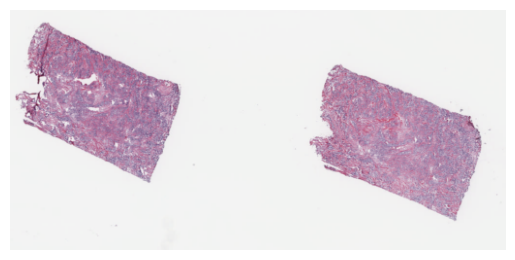

In [ ]:
from wsidicom import WsiDicom

# Open slide with wsidicom
slide = WsiDicom.open(os.path.join(example_slides_dir, selection.iloc[0]['SeriesInstanceUID']))
print('Tissue type: ', selection.iloc[0]['primaryAnatomicStructureModifier_CodeMeaning'])
# Check which levels are available
print('Available levels: ')
for level in slide.levels:
    print(level)
# Plot overview image
plt.imshow(slide.read_thumbnail(size=(512,512)))
plt.axis('off')
plt.show()